<a href="https://colab.research.google.com/github/rimi22duity/NLP-experiments/blob/main/week4_sequence2sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Learn to calculate with seq2seq model**
In this assignment, you will learn how to use neural networks to solve sequence-to-sequence prediction tasks. Seq2Seq models are very popular these days because they achieve great results in Machine Translation, Text Summarization, Conversational Modeling and more.

Using sequence-to-sequence modeling you are going to build a calculator for evaluating arithmetic expressions, by taking an equation as an input to the neural network and producing an answer as it's output.

The resulting solution for this problem will be based on state-of-the-art approaches for sequence-to-sequence learning and you should be able to easily adapt it to solve other tasks. However, if you want to train your own machine translation system or intellectual chat bot, it would be useful to have access to compute resources like GPU, and be patient, because training of such systems is usually time consuming.

# **Libraries**
For this task you will need the following libraries:

- [TensorFlow](https://https://www.tensorflow.org/) — an open-source software library for Machine Intelligence.

In this assignment, we use Tensorflow 1.15.0. You can install it with pip:

  `!pip install tensorflow==1.15.0`

- [scikit-learn](https://https://scikit-learn.org/stable/index.html) — a tool for data mining and data analysis.

If you have never worked with TensorFlow, you will probably want to read some tutorials during your work on this assignment, e.g. [Neural Machine Translation ](https://www.tensorflow.org/addons/tutorials/networks_seq2seq_nmt)tutorial deals with very similar task and can explain some concepts to you.

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    ! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py
    import setup_google_colab
    setup_google_colab.setup_week4()

--2021-07-06 23:26:54--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1939 (1.9K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.89K  --.-KB/s    in 0s      

2021-07-06 23:26:54 (30.2 MB/s) - ‘setup_google_colab.py’ saved [1939/1939]



# **Data**
One benefit of this task is that you don't need to download any data — you will generate it on your own! We will use two operators (addition and subtraction) and work with positive integer numbers in some range. Here are examples of correct inputs and outputs:

              Input: '1+2'
              Output: '3'

              Input: '0-99'
              Output: '-99'

*Note, that there are no spaces between operators and operands.*

Now you need to implement the function *generate_equations*, which will be used to generate the data.

In [2]:
import random

In [3]:
def generate_equations(allowed_operators, dataset_size, min_value, max_value):
    """Generates pairs of equations and solutions to them.
    
       Each equation has a form of two integers with an operator in between.
       Each solution is an integer with the result of the operaion.
    
        allowed_operators: list of strings, allowed operators.
        dataset_size: an integer, number of equations to be generated.
        min_value: an integer, min value of each operand.
        max_value: an integer, max value of each operand.

        result: a list of tuples of strings (equation, solution).
    """
    sample = []
    for _ in range(dataset_size):
      first_num = random.randint(min_value, max_value)
      second_num = random.randint(min_value, max_value)
      operator = allowed_operators[random.randint(0, len(allowed_operators)-1)]

      if operator == '+':
        out = first_num + second_num
      if operator == '-':
        out = first_num - second_num

      sample.append((str(first_num)+str(operator)+str(second_num), str(out))) 
    return sample

To check the correctness of your implementation, use test_generate_equations function:

In [4]:
def test_generate_equations():
    allowed_operators = ['+', '-']
    dataset_size = 10
    for (input_, output_) in generate_equations(allowed_operators, dataset_size, 0, 100):
        if not (type(input_) is str and type(output_) is str):
            return "Both parts should be strings."
        if eval(input_) != int(output_):
            return "The (equation: {!r}, solution: {!r}) pair is incorrect.".format(input_, output_)
    return "Tests passed."

In [5]:
print(test_generate_equations())

Tests passed.



Finally, we are ready to generate the train and test data for the neural network:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
allowed_operators = ['+', '-']
dataset_size = 100000
data = generate_equations(allowed_operators, dataset_size, min_value=0, max_value=9999)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
train_set

[('4790-6737', '-1947'),
 ('534+7554', '8088'),
 ('8939+3133', '12072'),
 ('7621+4733', '12354'),
 ('8484+9983', '18467'),
 ('6101-5374', '727'),
 ('9795-329', '9466'),
 ('841-4974', '-4133'),
 ('1911+5721', '7632'),
 ('4004+166', '4170'),
 ('2903-2179', '724'),
 ('7542+1640', '9182'),
 ('3203-614', '2589'),
 ('5860+3669', '9529'),
 ('6599-8914', '-2315'),
 ('102+156', '258'),
 ('2866-8015', '-5149'),
 ('9299+6070', '15369'),
 ('6252-4299', '1953'),
 ('249-6036', '-5787'),
 ('8754-437', '8317'),
 ('7717-5268', '2449'),
 ('5190-2357', '2833'),
 ('2324-7584', '-5260'),
 ('1875+5147', '7022'),
 ('908+5498', '6406'),
 ('8993-2473', '6520'),
 ('5414-5709', '-295'),
 ('7566-6699', '867'),
 ('2025+9198', '11223'),
 ('4171-5064', '-893'),
 ('885-5288', '-4403'),
 ('9282-8797', '485'),
 ('8612+2468', '11080'),
 ('1887+561', '2448'),
 ('4499+6370', '10869'),
 ('989+8147', '9136'),
 ('7042-1246', '5796'),
 ('1861+9373', '11234'),
 ('6672-6131', '541'),
 ('2374+7109', '9483'),
 ('8833-5918', '2915

# **Prepare data for the neural network**
The next stage of data preparation is creating mappings of the characters to their indices in some vocabulary. Since in our task we already know which symbols will appear in the inputs and outputs, generating the vocabulary is a simple step.

**How to create dictionaries for other task**

First of all, you need to understand what is the basic unit of the sequence in your task. In our case, we operate on symbols and the basic unit is a symbol. The number of symbols is small, so we don't need to think about filtering/normalization steps. However, in other tasks, the basic unit is often a word, and in this case the mapping would be word     $\to$ *integer*. The number of words might be huge, so it would be reasonable to filter them, for example, by frequency and leave only the frequent ones. Other strategies that your should consider are: data normalization (lowercasing, tokenization, how to consider punctuation marks), separate vocabulary for input and for output (e.g. for machine translation), some specifics of the task.

In [9]:
for i, symbol in enumerate('#^$+-1234567890'):
  print(i, symbol)

0 #
1 ^
2 $
3 +
4 -
5 1
6 2
7 3
8 4
9 5
10 6
11 7
12 8
13 9
14 0


In [12]:
word2id = {symbol:i for i, symbol in enumerate('#^$+-1234567890')}
id2word = {i:symbol for symbol, i in word2id.items()}

In [13]:
print(word2id)

{'#': 0, '^': 1, '$': 2, '+': 3, '-': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '0': 14}


In [14]:
print(id2word)

{0: '#', 1: '^', 2: '$', 3: '+', 4: '-', 5: '1', 6: '2', 7: '3', 8: '4', 9: '5', 10: '6', 11: '7', 12: '8', 13: '9', 14: '0'}


 **Special symbols**

In [15]:
start_symbol = '^'
end_symbol = '$'
padding_symbol = '#'

You could notice that we have added 3 special symbols: '^', '\$' and '#':

- '^' symbol will be passed to the network to indicate the beginning of the decoding procedure. We will discuss this one later in more details.
- '\$' symbol will be used to indicate the end of a string, both for input and output sequences.
- '#' symbol will be used as a padding character to make lengths of all strings equal within one training batch.

People have a bit different habits when it comes to special symbols in encoder-decoder networks, so don't get too much confused if you come across other variants in tutorials you read.



 **Padding**

When vocabularies are ready, we need to be able to convert a sentence to a list of vocabulary word indices and back. At the same time, let's care about padding. We are going to preprocess each sequence from the input (and output ground truth) in such a way that:

- it has a predefined length *padded_len*
- it is probably cut off or padded with the *padding symbol* '#'
- it always ends with the *end symbol* '$'

We will treat the original characters of the sequence **and the end symbol** as the valid part of the input. We will store *the actual length* of the sequence, which includes the end symbol, but does not include the padding symbols.

Now you need to implement the function *sentence_to_ids* that does the described job.

In [16]:
def sentence_to_ids(sentence, word2id, padded_len):
    """ Converts a sequence of symbols to a padded sequence of their ids.
    
      sentence: a string, input/output sequence of symbols.
      word2id: a dict, a mapping from original symbols to ids.
      padded_len: an integer, a desirable length of the sequence.

      result: a tuple of (a list of ids, an actual length of sentence).
    """
    #sent_ids = ######### YOUR CODE HERE #############
    #sent_len = ######### YOUR CODE HERE #############
    sent_ids = [word2id[sym] for sym in sentence[:padded_len]]
    sent_len = len(sent_ids[:padded_len-1])+1 
    if padded_len > len(sentence):
      sent_ids.append(word2id['$'])
      sent_ids += [word2id['#']]*(padded_len-len(sent_ids))
    else:
      sent_ids[-1] = word2id['$']
    
    # print(sent_ids)
    # print(sent_len)
    
    return sent_ids, sent_len

In [17]:
sentences = [("123+123", 7), ("123+123", 8), ("123+123", 10)]
expected_output = [([5, 6, 7, 3, 5, 6, 2], 7), 
                   ([5, 6, 7, 3, 5, 6, 7, 2], 8), 
                   ([5, 6, 7, 3, 5, 6, 7, 2, 0, 0], 8)]
for (sentence, padded_len), (sentence_ids, expected_length) in zip(sentences, expected_output):
  print(sentence)
  print(padded_len)
  sentence_to_ids(sentence, word2id, padded_len)

123+123
7
123+123
8
123+123
10


In [18]:
def test_sentence_to_ids():
    sentences = [("123+123", 7), ("123+123", 8), ("123+123", 10)]
    expected_output = [([5, 6, 7, 3, 5, 6, 2], 7), 
                       ([5, 6, 7, 3, 5, 6, 7, 2], 8), 
                       ([5, 6, 7, 3, 5, 6, 7, 2, 0, 0], 8)] 
    for (sentence, padded_len), (sentence_ids, expected_length) in zip(sentences, expected_output):
        output, length = sentence_to_ids(sentence, word2id, padded_len)
        if output != sentence_ids:
            return("Convertion of '{}' for padded_len={} to {} is incorrect.".format(
                sentence, padded_len, output))
        if length != expected_length:
            return("Convertion of '{}' for padded_len={} has incorrect actual length {}.".format(
                sentence, padded_len, length))
    return("Tests passed.")

In [19]:
print(test_sentence_to_ids())

Tests passed.


We also need to be able to get back from indices to symbols:

In [21]:
def ids_to_sentence(ids, id2word):
    """ Converts a sequence of ids to a sequence of symbols.
    
          ids: a list, indices for the padded sequence.
          id2word:  a dict, a mapping from ids to original symbols.

          result: a list of symbols.
    """
 
    return [id2word[i] for i in ids]

**Generating batches**

The final step of data preparation is a function that transforms a batch of sentences to a list of lists of indices.

In [26]:
def batch_to_ids(sentences, word2id, max_len):
    """Prepares batches of indices. 
    
       Sequences are padded to match the longest sequence in the batch,
       if it's longer than max_len, then max_len is used instead.

        sentences: a list of strings, original sequences.
        word2id: a dict, a mapping from original symbols to ids.
        max_len: an integer, max len of sequences allowed.

        result: a list of lists of ids, a list of actual lengths.
    """
    
    max_len_in_batch = min(max(len(s) for s in sentences) + 1, max_len)
    batch_ids, batch_ids_len = [], []
    for sentence in sentences:
        ids, ids_len = sentence_to_ids(sentence, word2id, max_len_in_batch)
        batch_ids.append(ids)
        batch_ids_len.append(ids_len)
    return batch_ids, batch_ids_len

The function generate_batches will help to generate batches with defined size from given samples.

In [27]:
def generate_batches(samples, batch_size=64):
    X, Y = [], []
    for i, (x, y) in enumerate(samples, 1):
        X.append(x)
        Y.append(y)
        if i % batch_size == 0:
            yield X, Y
            X, Y = [], []
    if X and Y:
        yield X, Y

To illustrate the result of the implemented functions, run the following cell:

In [28]:
sentences = train_set[0]
ids, sent_lens = batch_to_ids(sentences, word2id, max_len=10)
print('Input:', sentences)
print('Ids: {}\nSentences lengths: {}'.format(ids, sent_lens))

Input: ('4790-6737', '-1947')
Ids: [[8, 11, 13, 14, 4, 10, 11, 7, 11, 2], [4, 5, 13, 8, 11, 2, 0, 0, 0, 0]]
Sentences lengths: [10, 6]


# **Encoder-Decoder architecture**
Encoder-Decoder is a successful architecture for Seq2Seq tasks with different lengths of input and output sequences. The main idea is to use two recurrent neural networks, where the first neural network encodes the input sequence into a real-valued vector and then the second neural network decodes this vector into the output sequence. While building the neural network, we will specify some particular characteristics of this architecture.

In [29]:
%tensorflow_version 1.x
import tensorflow as tf


TensorFlow 1.x selected.


In [30]:
print(tf.__version__)

1.15.2


Let us use TensorFlow building blocks to specify the network architecture.

In [31]:
class Seq2SeqModel(object):
    pass

First, we need to create placeholders to specify what data we are going to feed into the network during the execution time. For this task we will need:

- *input_batch* — sequences of sentences (the shape will equal to [batch_size, max_sequence_len_in_batch]);
- *input_batch_lengths* — lengths of not padded sequences (the shape equals to [batch_size]);
- *ground_truth* — sequences of groundtruth (the shape will equal to [batch_size, max_sequence_len_in_batch]);
- *ground_truth_lengths* — lengths of not padded groundtruth sequences (the shape equals to [batch_size]);
- *dropout_ph* — dropout keep probability; this placeholder has a predifined value 1;
-*learning_rate_ph* — learning rate.

In [32]:
def declare_placeholders(self):
    """Specifies placeholders for the model."""
    
    # Placeholders for input and its actual lengths.
    self.input_batch = tf.placeholder(shape=(None, None), dtype=tf.int32, name='input_batch')
    self.input_batch_lengths = tf.placeholder(shape=(None, ), dtype=tf.int32, name='input_batch_lengths')
    
    # Placeholders for groundtruth and its actual lengths.
    self.ground_truth = tf.placeholder(shape=(None,None), dtype=tf.int32, name='ground_truth')
    self.ground_truth_lengths = tf.placeholder(shape=(None, ), dtype=tf.int32, name='ground_truth_lengths')
        
    self.dropout_ph = tf.placeholder_with_default(tf.cast(1.0, tf.float32), shape=[])
    self.learning_rate_ph = tf.placeholder(shape=[],dtype=tf.float32,name='learning_rate_ph')

In [33]:
Seq2SeqModel.__declare_placeholders = classmethod(declare_placeholders)

Now, let us specify the layers of the neural network. First, we need to prepare an embedding matrix. Since we use the same vocabulary for input and output, we need only one such matrix. For tasks with different vocabularies there would be multiple embedding layers.

- Create embeddings matrix with [tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable). Specify its name, type (tf.float32), and initialize with random values.
- Perform [embeddings lookup](https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup) for a given input batch.

In [34]:
def create_embeddings(self, vocab_size, embeddings_size):
    """Specifies embeddings layer and embeds an input batch."""
     
    random_initializer = tf.random_uniform((vocab_size, embeddings_size), -1.0, 1.0)
    self.embeddings = tf.Variable(initial_value=random_initializer, dtype=tf.float32) 
    
    # Perform embeddings lookup for self.input_batch. 
    self.input_batch_embedded = tf.nn.embedding_lookup(self.embeddings,self.input_batch)

In [35]:
Seq2SeqModel.__create_embeddings = classmethod(create_embeddings)

**Encoder**

The first RNN of the current architecture is called an encoder and serves for encoding an input sequence to a real-valued vector. Input of this RNN is an embedded input batch. Since sentences in the same batch could have different actual lengths, we also provide input lengths to avoid unnecessary computations. The final encoder state will be passed to the second RNN (decoder), which we will create soon.

- TensorFlow provides a number of RNN cells ready for use. We suggest that you use [GRU cell](https://www.tensorflow.org/api_docs/python/tf/compat/v1/nn/rnn_cell/GRUCell), but you can also experiment with other types.
- Wrap your cells with [DropoutWrapper](https://tf.compat.v1.nn.rnn_cell.DropoutWrapper). Dropout is an important regularization technique for neural networks. Specify input keep probability using the dropout placeholder that we created before.
- Combine the defined encoder cells with [Dynamic RNN](https://www.tensorflow.org/api_docs/python/tf/compat/v1/nn/dynamic_rnn). Use the embedded input batches and their lengths here.
- Use *dtype=tf.float32* everywhere.

In [36]:
def build_encoder(self, hidden_size):
    """Specifies encoder architecture and computes its output."""
    
    # Create GRUCell with dropout.
    encoder_cell = tf.nn.rnn_cell.DropoutWrapper(tf.compat.v1.nn.rnn_cell.GRUCell(hidden_size), input_keep_prob=self.dropout_ph)
    
    # Create RNN with the predefined cell.
    _, self.final_encoder_state = tf.nn.dynamic_rnn(encoder_cell, 
                                                    self.input_batch_embedded, 
                                                    sequence_length=self.input_batch_lengths, 
                                                    dtype=tf.float32)

In [37]:
Seq2SeqModel.__build_encoder = classmethod(build_encoder)

**Decoder**

The second RNN is called a decoder and serves for generating the output sequence. In the simple seq2seq arcitecture, the input sequence is provided to the decoder only as the final state of the encoder. Obviously, it is a bottleneck and [Attention techniques](https://) can help to overcome it. So far, we do not need them to make our calculator work, but this would be a necessary ingredient for more advanced tasks.

During training, decoder also uses information about the true output. It is feeded in as input symbol by symbol. However, during the prediction stage (which is called inference in this architecture), the decoder can only use its own generated output from the previous step to feed it in at the next step. Because of this difference (training vs inference), we will create two distinct instances, which will serve for the described scenarios.

The picture below illustrates the point. It also shows our work with the special characters, e.g. look how the start symbol ^ is used. The transparent parts are ignored. In decoder, it is masked out in the loss computation. In encoder, the green state is considered as final and passed to the decoder.

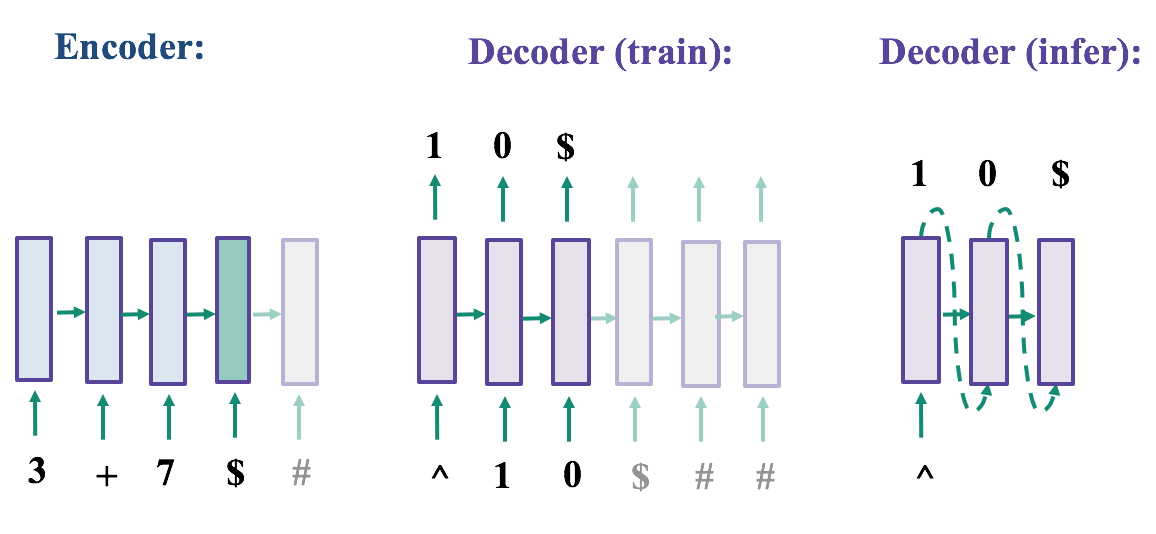

Now, it's time to implement the decoder:

- First, we should create two [helpers](https://). These classes help to determine the behaviour of the decoder. During the training time, we will use [TrainingHelper](https://). For the inference we recommend to use [GreedyEmbeddingHelper](https://).
- To share all parameters during training and inference, we use one scope and set the flag 'reuse' to True at inference time. You might be interested to know more about how [variable scopes](https://) work in TF.
- To create the decoder itself, we will use [BasicDecoder](https://) class. As previously, you should choose some RNN cell, e.g. GRU cell. To turn hidden states into logits, we will need a projection layer. One of the simple solutions is using [OutputProjectionWrapper](https://).
- For getting the predictions, it will be convinient to use [dynamic_decode](https://). This function uses the provided decoder to perform decoding.

In [38]:
def build_decoder(self, hidden_size, vocab_size, max_iter, start_symbol_id, end_symbol_id):
    """Specifies decoder architecture and computes the output.
    
        Uses different helpers:
          - for train: feeding ground truth
          - for inference: feeding generated output

        As a result, self.train_outputs and self.infer_outputs are created. 
        Each of them contains two fields:
          rnn_output (predicted logits)
          sample_id (predictions).

    """
    
    # Use start symbols as the decoder inputs at the first time step.
    batch_size = tf.shape(self.input_batch)[0]
    start_tokens = tf.fill([batch_size], start_symbol_id)
    ground_truth_as_input = tf.concat([tf.expand_dims(start_tokens, 1), self.ground_truth], 1)
    
    # Use the embedding layer defined before to lookup embedings for ground_truth_as_input. 
    self.ground_truth_embedded = tf.nn.embedding_lookup(self.embeddings,ground_truth_as_input)
     
    # Create TrainingHelper for the train stage.
    # train_helper = tfa.seq2seq.sampler.TrainingSampler.initialize(self.ground_truth_embedded, 
    #                                                                self.ground_truth_lengths)
    train_helper = tf.contrib.seq2seq.TrainingHelper(self.ground_truth_embedded, 
                                                     self.ground_truth_lengths)
    
    # Create GreedyEmbeddingHelper for the inference stage.
    # You should provide the embedding layer, start_tokens and index of the end symbol.
    infer_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(self.embeddings, start_tokens, end_symbol_id)
    
  
    def decode(helper, scope, reuse=None):
        """Creates decoder and return the results of the decoding with a given helper."""
        
        with tf.variable_scope(scope, reuse=reuse):
            # Create GRUCell with dropout. Do not forget to set the reuse flag properly.
            decoder_cell = tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.GRUCell(hidden_size, reuse=reuse),
                                                         input_keep_prob=self.dropout_ph)
            
            # Create a projection wrapper.
            decoder_cell = tf.contrib.rnn.OutputProjectionWrapper(decoder_cell, vocab_size, reuse=reuse)
            
            # Create BasicDecoder, pass the defined cell, a helper, and initial state.
            # The initial state should be equal to the final state of the encoder!
            decoder = tf.contrib.seq2seq.BasicDecoder(cell=decoder_cell, helper=helper, initial_state=self.final_encoder_state)
            
            # The first returning argument of dynamic_decode contains two fields:
            #   rnn_output (predicted logits)
            #   sample_id (predictions)
            outputs, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder=decoder, maximum_iterations=max_iter, 
                                                              output_time_major=False, impute_finished=True)

            return outputs
        
    self.train_outputs = decode(train_helper, 'decode')
    self.infer_outputs = decode(infer_helper, 'decode', reuse=True)

In [39]:
Seq2SeqModel.__build_decoder = classmethod(build_decoder)

In this task we will use [sequence_loss](https://https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/contrib), which is a weighted cross-entropy loss for a sequence of logits. Take a moment to understand, what is your train logits and targets. Also note, that we do not want to take into account loss terms coming from padding symbols, so we will mask them out using weights.

In [40]:
def compute_loss(self):
    """Computes sequence loss (masked cross-entopy loss with logits)."""
    
    weights = tf.cast(tf.sequence_mask(self.ground_truth_lengths), dtype=tf.float32)
    
    self.loss =tf.contrib.seq2seq.sequence_loss(
        self.train_outputs.rnn_output,
        self.ground_truth,
        weights
    )

In [41]:
Seq2SeqModel.__compute_loss = classmethod(compute_loss)

The last thing to specify is the optimization of the defined loss. We suggest that you use [optimize_loss](https://https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/contrib/layers/optimize_loss) with Adam optimizer and a learning rate from the corresponding placeholder. You might also need to pass global step (e.g. as tf.train.get_global_step()) and clip gradients by 1.0.

In [42]:
def perform_optimization(self):
    """Specifies train_op that optimizes self.loss."""
    
    self.train_op = tf.contrib.layers.optimize_loss(
        loss=self.loss,
        optimizer='Adam',
        learning_rate=self.learning_rate_ph,
        clip_gradients=1.0,
        global_step=tf.train.get_global_step()
    )

In [43]:
Seq2SeqModel.__perform_optimization = classmethod(perform_optimization)

Congratulations! You have specified all the parts of your network. You may have noticed, that we didn't deal with any real data yet, so what you have written is just recipies on how the network should function. Now we will put them to the constructor of our Seq2SeqModel class to use it in the next section.

In [44]:
def init_model(self, vocab_size, embeddings_size, hidden_size, 
               max_iter, start_symbol_id, end_symbol_id, padding_symbol_id):
    
    self.__declare_placeholders()
    self.__create_embeddings(vocab_size, embeddings_size)
    self.__build_encoder(hidden_size)
    self.__build_decoder(hidden_size, vocab_size, max_iter, start_symbol_id, end_symbol_id)
    
    # Compute loss and back-propagate.
    self.__compute_loss()
    self.__perform_optimization()
    
    # Get predictions for evaluation.
    self.train_predictions = self.train_outputs.sample_id
    self.infer_predictions = self.infer_outputs.sample_id

In [45]:
Seq2SeqModel.__init__ = classmethod(init_model)

# **Train the network and predict output**
Session.run is a point which initiates computations in the graph that we have defined. To train the network, we need to compute self.train_op. To predict output, we just need to compute self.infer_predictions. In any case, we need to feed actual data through the placeholders that we defined above.



In [46]:
def train_on_batch(self, session, X, X_seq_len, Y, Y_seq_len, learning_rate, dropout_keep_probability):
    feed_dict = {
            self.input_batch: X,
            self.input_batch_lengths: X_seq_len,
            self.ground_truth: Y,
            self.ground_truth_lengths: Y_seq_len,
            self.learning_rate_ph: learning_rate,
            self.dropout_ph: dropout_keep_probability
        }
    pred, loss, _ = session.run([
            self.train_predictions,
            self.loss,
            self.train_op], feed_dict=feed_dict)
    return pred, loss

In [47]:
Seq2SeqModel.train_on_batch = classmethod(train_on_batch)

We implemented two prediction functions: predict_for_batch and predict_for_batch_with_loss. The first one allows only to predict output for some input sequence, while the second one could compute loss because we provide also ground truth values. Both these functions might be useful since the first one could be used for predicting only, and the second one is helpful for validating results on not-training data during the training.

In [48]:
def predict_for_batch(self, session, X, X_seq_len):
    feed_dict = {
            self.input_batch: X,
            self.input_batch_lengths: X_seq_len
    }
    pred = session.run([
            self.infer_predictions
        ], feed_dict=feed_dict)[0]
    return pred

def predict_for_batch_with_loss(self, session, X, X_seq_len, Y, Y_seq_len):
    feed_dict = {
            self.input_batch: X,
            self.input_batch_lengths: X_seq_len,
            self.ground_truth: Y,
            self.ground_truth_lengths: Y_seq_len
    }
    pred, loss = session.run([
            self.infer_predictions,
            self.loss,
        ], feed_dict=feed_dict)
    return pred, loss

In [49]:
Seq2SeqModel.predict_for_batch = classmethod(predict_for_batch)
Seq2SeqModel.predict_for_batch_with_loss = classmethod(predict_for_batch_with_loss)

# **Run your experiment**
Create Seq2SeqModel model with the following parameters:

- *vocab_size* — number of tokens;
- *embeddings_size* — dimension of embeddings, recommended value: 20;
- *max_iter* — maximum number of steps in decoder, recommended value: 7;
- *hidden_size* — size of hidden layers for RNN, recommended value: 512;
- *start_symbol_id* — an index of the start token (^).
- *end_symbol_id* — an index of the end token ($).
- *padding_symbol_id* — an index of the padding token (#).

Set hyperparameters. You might want to start with the following values and see how it works:

- *batch_size*: 128;
- at least 10 epochs;
- value of *learning_rate*: 0.001
- *dropout_keep_probability* equals to 0.5 for training (typical values for dropout probability are ranging from 0.1 to 1.0); larger values correspond smaler number of dropout units;
- *max_len*: 20.

In [51]:
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph()

model = Seq2SeqModel(
    vocab_size = len(word2id),
    embeddings_size=20,
    max_iter=7,
    hidden_size=512,
    start_symbol_id=word2id['^'],
    end_symbol_id=word2id['$'],
    padding_symbol_id = word2id['#']
)

batch_size = 128
n_epochs = 10
learning_rate = 0.001
dropout_keep_probability = 0.5
max_len = 20

n_step = int(len(train_set) / batch_size)

Finally, we are ready to run the training! A good indicator that everything works fine is decreasing loss during the training.

In [52]:
session = tf.Session()
session.run(tf.global_variables_initializer())
            
invalid_number_prediction_counts = []
all_model_predictions = []
all_ground_truth = []

print('Start training... \n')
for epoch in range(n_epochs):  
    random.shuffle(train_set)
    random.shuffle(test_set)
    
    print('Train: epoch', epoch + 1)
    for n_iter, (X_batch, Y_batch) in enumerate(generate_batches(train_set, batch_size=batch_size)):
        # prepare the data (X_batch and Y_batch) for training
        # using function batch_to_ids
        X_ids, X_sent_lens = batch_to_ids(X_batch, word2id, max_len=max_len)
        Y_ids, Y_sent_lens = batch_to_ids(Y_batch, word2id, max_len=max_len)

        predictions, loss = model.train_on_batch(
            session,
            X_ids,
            X_sent_lens,
            Y_ids,
            Y_sent_lens,
            learning_rate,
            dropout_keep_probability
        )
  
        
        if n_iter % 200 == 0:
            print("Epoch: [%d/%d], step: [%d/%d], loss: %f" % (epoch + 1, n_epochs, n_iter + 1, n_step, loss))
                
    X_sent, Y_sent = next(generate_batches(test_set, batch_size=batch_size))
    # prepare test data (X_sent and Y_sent) for predicting 
    # quality and computing value of the loss function
    # using function batch_to_ids

    X, X_sent_lens = batch_to_ids(X_sent, word2id, max_len=max_len)
    Y, Y_sent_lens = batch_to_ids(Y_sent, word2id, max_len=max_len)
    
    predictions, loss = model.predict_for_batch_with_loss(
        session,
        X,
        X_sent_lens,
        Y,
        Y_sent_lens
    )
    print('Test: epoch', epoch + 1, 'loss:', loss,)
    for x, y, p  in list(zip(X, Y, predictions))[:3]:
        print('X:',''.join(ids_to_sentence(x, id2word)))
        print('Y:',''.join(ids_to_sentence(y, id2word)))
        print('O:',''.join(ids_to_sentence(p, id2word)))
        print('')

    model_predictions = []
    ground_truth = []
    invalid_number_prediction_count = 0
    # For the whole test set calculate ground-truth values (as integer numbers)
    # and prediction values (also as integers) to calculate metrics.
    # If generated by model number is not correct (e.g. '1-1'), 
    # increase invalid_number_prediction_count and don't append this and corresponding
    # ground-truth value to the arrays.
    for X_batch, Y_batch in generate_batches(test_set, batch_size=batch_size):
        X_ids, X_sent_lens = batch_to_ids(X_batch, word2id, max_len=max_len)
        Y_ids, Y_sent_lens = batch_to_ids(Y_batch, word2id, max_len=max_len)
        predictions = model.predict_for_batch(session, X_ids, X_sent_lens)
        for y, p in zip(Y_ids, predictions):
            y_sent = ''.join(ids_to_sentence(y, id2word))
            y_sent = y_sent[:y_sent.find('$')]
            p_sent = ''.join(ids_to_sentence(p, id2word))
            p_sent = p_sent[:p_sent.find('$')]
            if p_sent.isdigit() or (p_sent.startswith('-') and p_sent[1:].isdigit()):
                model_predictions.append(int(p_sent))
                ground_truth.append(int(y_sent))
            else:
                invalid_number_prediction_count += 1
   
    all_model_predictions.append(model_predictions)
    all_ground_truth.append(ground_truth)
    invalid_number_prediction_counts.append(invalid_number_prediction_count)
            
print('\n...training finished.')

Start training... 

Train: epoch 1
Epoch: [1/10], step: [1/625], loss: 2.722513
Epoch: [1/10], step: [201/625], loss: 1.785075
Epoch: [1/10], step: [401/625], loss: 1.741062
Epoch: [1/10], step: [601/625], loss: 1.657481
Test: epoch 1 loss: 1.5742265
X: 13-6350$##
Y: -6337$
O: -7225$

X: 8659+8511$
Y: 17170$
O: 15805$

X: 8386+9903$
Y: 18289$
O: 18885$

Train: epoch 2
Epoch: [2/10], step: [1/625], loss: 1.629014
Epoch: [2/10], step: [201/625], loss: 1.573773
Epoch: [2/10], step: [401/625], loss: 1.513605
Epoch: [2/10], step: [601/625], loss: 1.466187
Test: epoch 2 loss: 1.4180815
X: 6884+8183$
Y: 15067$
O: 16260$

X: 2919-445$#
Y: 2474$#
O: 2228$#

X: 8813-9318$
Y: -505$#
O: -1055$

Train: epoch 3
Epoch: [3/10], step: [1/625], loss: 1.454603
Epoch: [3/10], step: [201/625], loss: 1.410961
Epoch: [3/10], step: [401/625], loss: 1.423805
Epoch: [3/10], step: [601/625], loss: 1.375611
Test: epoch 3 loss: 1.331495
X: 783-7907$#
Y: -7124$
O: -7300$

X: 4691+5914$
Y: 10605$
O: 10449$

X: 4637+

# **Evaluate results**
Because our task is simple and the output is straight-forward, we will use [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) metric to evaluate the trained model during the epochs. Compute the value of the metric for the output from each epoch.



In [53]:
from sklearn.metrics import mean_absolute_error

In [55]:
for i, (gts, predictions, invalid_number_prediction_count) in enumerate(zip(all_ground_truth,
                                                                            all_model_predictions,
                                                                            invalid_number_prediction_counts), 1):
    mae = mean_absolute_error(gts, predictions)
    print("Epoch: %i, MAE: %f, Invalid numbers: %i" % (i, mae, invalid_number_prediction_count))

Epoch: 1, MAE: 998.066250, Invalid numbers: 0
Epoch: 2, MAE: 358.144250, Invalid numbers: 0
Epoch: 3, MAE: 249.789500, Invalid numbers: 0
Epoch: 4, MAE: 253.114600, Invalid numbers: 0
Epoch: 5, MAE: 192.573800, Invalid numbers: 0
Epoch: 6, MAE: 146.570650, Invalid numbers: 0
Epoch: 7, MAE: 95.780850, Invalid numbers: 0
Epoch: 8, MAE: 49.774700, Invalid numbers: 0
Epoch: 9, MAE: 41.842550, Invalid numbers: 0
Epoch: 10, MAE: 39.076350, Invalid numbers: 0
